In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
earth_df = pd.read_csv("Population Growth.csv")


In [3]:
earth_df.head()

,Year,Population Growth Rate,Growth Rate
0,1950,"2,499,322,157",0.00%
1,1951,"2,543,130,380",1.75%
2,1952,"2,590,270,899",1.85%
3,1953,"2,640,278,797",1.93%
4,1954,"2,691,979,339",1.96%


In [4]:
earth_df['Population Growth Rate'] = pd.to_numeric(earth_df['Population Growth Rate'].str.replace(',', ''))
earth_df.rename(columns={'Population Growth Rate':'Population'}, inplace=True)

In [5]:
earth_df.head(5)


,Year,Population,Growth Rate
0,1950,2499322157,0.00%
1,1951,2543130380,1.75%
2,1952,2590270899,1.85%
3,1953,2640278797,1.93%
4,1954,2691979339,1.96%


In [6]:
earth_df.tail(5)

,Year,Population,Growth Rate
69,2019,7764951032,1.06%
70,2020,7840952880,0.98%
71,2021,7909295151,0.87%
72,2022,7975105156,0.83%
73,2023,8045311447,0.88%


In [7]:
earth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         74 non-null     int64 
 1   Population   74 non-null     int64 
 2   Growth Rate  74 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


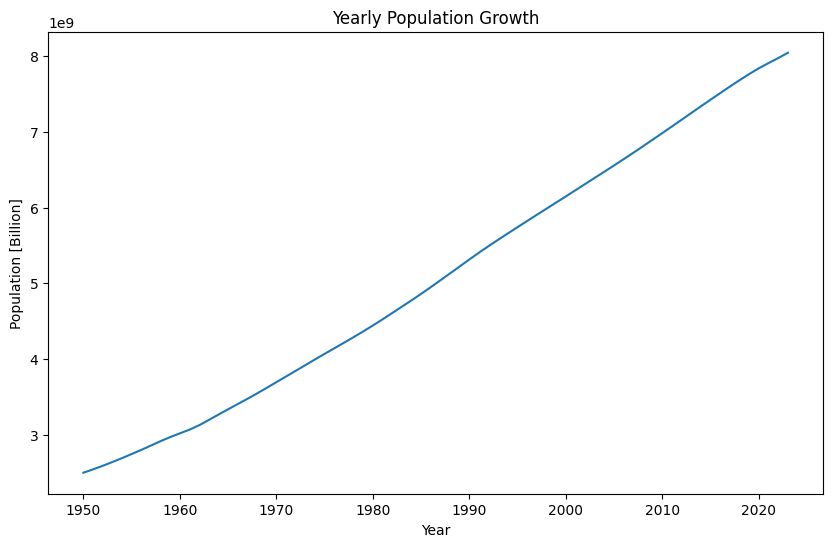

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=earth_df, x='Year', y='Population')

plt.title('Yearly Population Growth')
plt.xlabel('Year')
plt.ylabel('Population [Billion]')
plt.show()

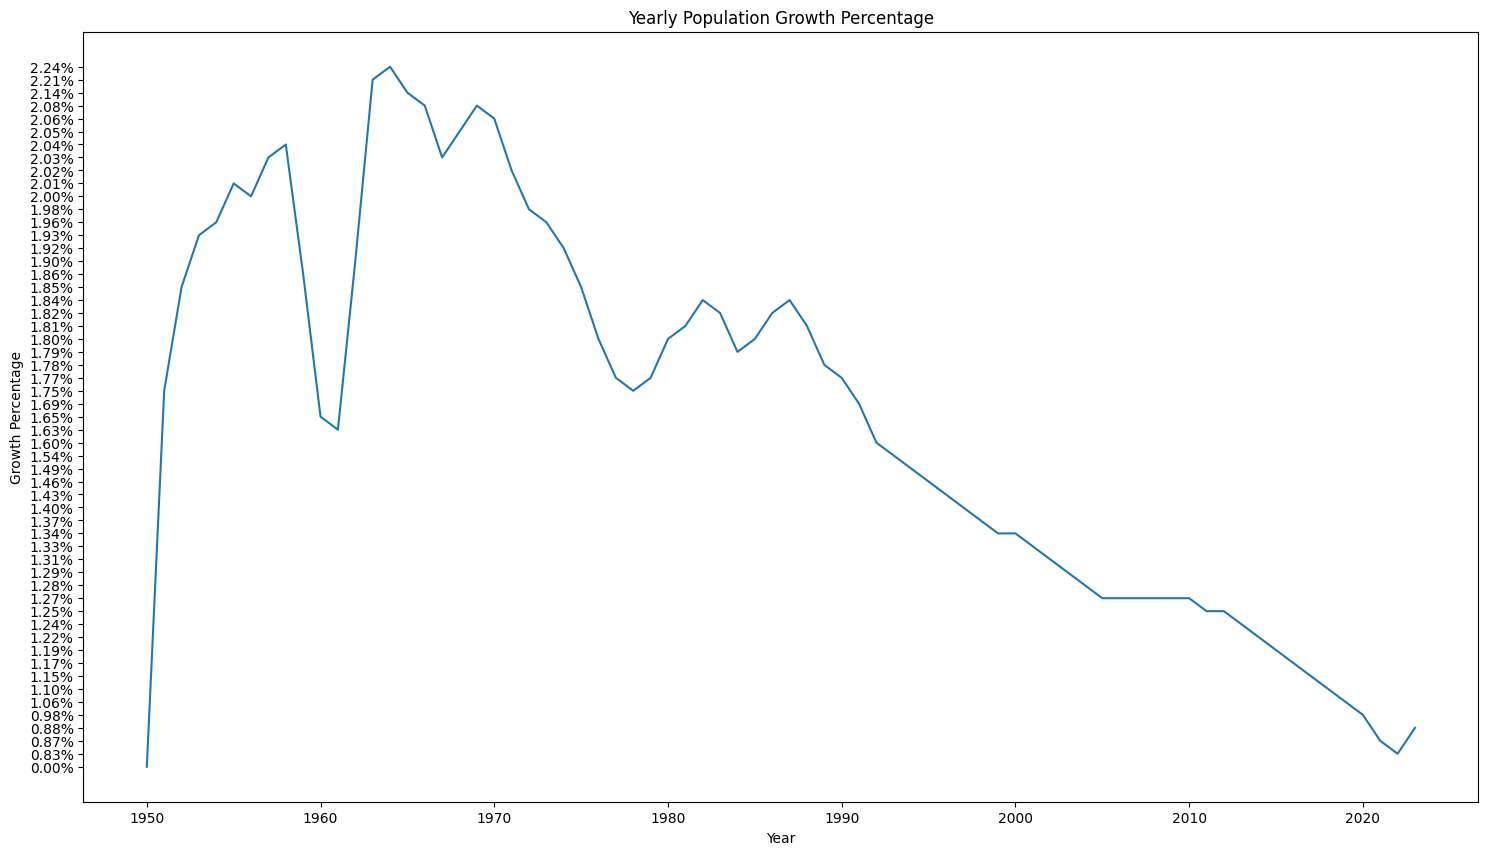

In [9]:
earth_df_srt = earth_df.sort_values(by='Growth Rate', ascending= False)
plt.figure(figsize=(18, 10))
sns.lineplot(data=earth_df_srt, x='Year', y='Growth Rate')
plt.title('Yearly Population Growth Percentage')
plt.xlabel('Year')
plt.ylabel('Growth Percentage')
plt.show()

In [10]:
earth_df["difference"] = earth_df['Population'].diff()

In [11]:
earth_df.head()

,Year,Population,Growth Rate,difference
0,1950,2499322157,0.00%,NaN
1,1951,2543130380,1.75%,43808223.0
2,1952,2590270899,1.85%,47140519.0
3,1953,2640278797,1.93%,50007898.0
4,1954,2691979339,1.96%,51700542.0


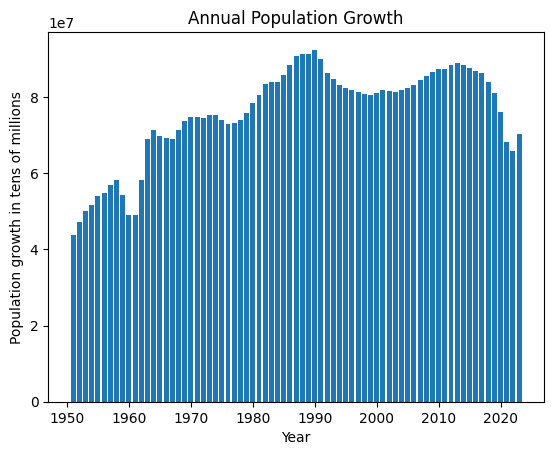

In [12]:
plt.bar(earth_df['Year'], earth_df['difference'])
plt.xlabel('Year')
plt.ylabel('Population growth in tens of millions')
plt.title('Annual Population Growth')
plt.show()

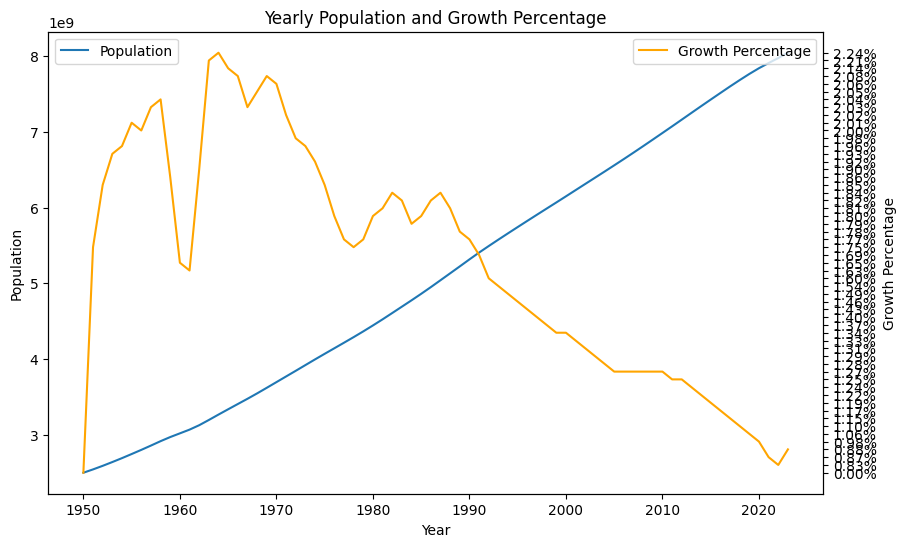

In [14]:

#Yearly population and growth plot
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.lineplot(data=earth_df_srt, x='Year', y='Population', ax=ax1, label='Population')
ax1.set_ylabel('Population')

ax2 = ax1.twinx()
sns.lineplot(data=earth_df_srt, x='Year', y='Growth Rate', ax=ax2, color='orange', label='Growth Percentage')
ax2.set_ylabel('Growth Percentage')

plt.title('Yearly Population and Growth Percentage')
plt.xlabel('Year')
plt.show()

### Models created by me

#### Logistic growth

In [15]:
num_years = earth_df["Year"].iloc[-1]-earth_df["Year"].iloc[0]
dt = 1

In [16]:
r = 0.05
k = 10000000000 #empirically chosen
start_pop = earth_df["Population"][0]
print(start_pop) #starting population of earth
print(k) #max

2499322157
10000000000


In [17]:
population = [start_pop]
for _ in range(num_years):
    dPdt = r * population[-1] * (1 - population[-1] / k)
    new_population = population[-1] + dPdt * dt
    population.append(new_population)


In [18]:
earth_df["Simulation"] = population

### Pretty good model, similar to reality

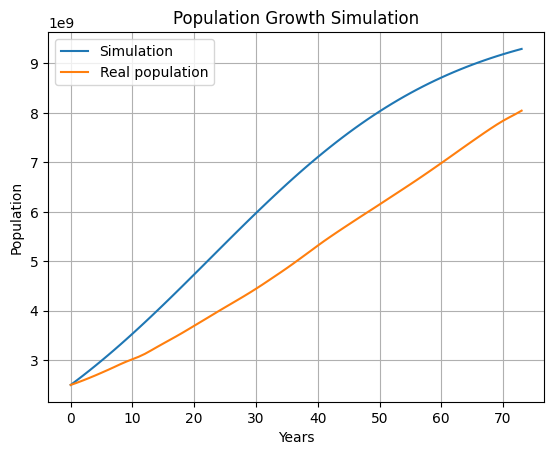

In [19]:
plt.plot(range(num_years+1), earth_df["Simulation"], label = "Simulation")
plt.plot(range(num_years+1), earth_df["Population"], label = "Real population")
plt.title('Population Growth Simulation')
plt.xlabel('Years')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()

### how much times did the population increase

In [20]:
ratio_earth = earth_df["Population"].iloc[-1]/earth_df["Population"].iloc[20]
ratio_earth

2.177120876412878

### second file

In [21]:
countries_df = pd.read_csv("World Population Live Dataset.csv")


### calculating the ratio for every country

In [22]:
countries_df.head()
countries_df["ratio"] = countries_df["2022"]/countries_df["1970"]

In [23]:
countries_df.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank,ratio
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1,1.733530
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2,2.542010
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3,1.688681
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4,2.390921
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5,3.977416


### changing into real values

In [25]:
countries_df['2022'] = countries_df['2022'] * 1000
countries_df['2020'] = countries_df['2020'] * 1000
countries_df['2015'] = countries_df['2015'] * 1000
countries_df['2010'] = countries_df['2010'] * 1000
countries_df['2000'] = countries_df['2000'] * 1000
countries_df['1990'] = countries_df['1990'] * 1000
countries_df['1980'] = countries_df['1980'] * 1000
countries_df['1970'] = countries_df['1970'] * 1000


In [26]:
countries_df.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank,ratio
0,CN,China,1425887000,1424930000,1393715000,1348191000,1264099000,1153704000,982372000,822534000,9706961,146.8933,1.00,17.88%,1,1.733530
1,IN,India,1417173000,1396387000,1322867000,1240614000,1059634000,870452000,696828000,557501000,3287590,431.0675,1.01,17.77%,2,2.542010
2,US,United States,338290000,335942000,324608000,311183000,282399000,248084000,223140000,200328000,9372610,36.0935,1.00,4.24%,3,1.688681
3,ID,Indonesia,275501000,271858000,259092000,244016000,214072000,182160000,148177000,115228000,1904569,144.6529,1.01,3.45%,4,2.390921
4,PK,Pakistan,235825000,227197000,210969000,194454000,154370000,115414000,80624000,59291000,881912,267.4018,1.02,2.96%,5,3.977416


In [27]:
countries_df.shape

(234, 16)

In [28]:
earth_df.head()

,Year,Population,Growth Rate,difference,Simulation
0,1950,2499322157,0.00%,NaN,2.499322e+09
1,1951,2543130380,1.75%,43808223.0,2.593055e+09
2,1952,2590270899,1.85%,47140519.0,2.689088e+09
3,1953,2640278797,1.93%,50007898.0,2.787387e+09
4,1954,2691979339,1.96%,51700542.0,2.887908e+09


In [29]:
dates = [1970,1980,1990,2000,2010,2015,2020,2022]
compare = earth_df[earth_df['Year'].isin(dates)]['Simulation']
compare

20    4.734820e+09
30    5.974075e+09
40    7.106525e+09
50    8.029920e+09
60    8.714395e+09
65    8.974008e+09
70    9.186326e+09
72    9.259501e+09
Name: Simulation, dtype: float64

## finding the countries which increase of population is the most similar to the model

In [30]:
from sklearn.metrics import mean_squared_error
corrs = []
for i in range(0,countries_df.shape[0]):
    trend1 = countries_df.iloc[i,2:10]
    trend1 = trend1[::-1]
    trend1
    arr = []
    for elements in trend1:
        arr.append(elements)
    multiply = earth_df["Simulation"].iloc[20]/arr[0] #we start in year 1970
    arr = [x * multiply for x in arr]
    corrmse = mean_squared_error(arr, compare)
    corrs.append(corrmse)

In [31]:
countries_df['MSE'] = corrs


In [32]:
countries_df = countries_df.sort_values(by='MSE', ascending=True)
countries_df.head(5)

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank,ratio,MSE
25,MM,Myanmar,54179000,53423000,51484000,49391000,45538000,40100000,33466000,27284000,676578,80.0784,1.01,0.68%,26,1.985743,1.440954e+16
103,HK,Hong Kong,7489000,7501000,7400000,7132000,6731000,5839000,4979000,3955000,1104,6783.3922,1.00,0.09%,104,1.893552,2.345704e+16
19,TH,Thailand,71697000,71476000,70294000,68270000,63067000,55228000,45738000,35792000,513120,139.7276,1.00,0.90%,20,2.003157,5.908165e+16
190,GU,Guam,172000,169000,168000,165000,160000,138000,110000,88000,549,312.8852,1.01,0.00%,191,1.954545,5.991154e+16
226,TV,Tuvalu,11000,11000,11000,11000,10000,9000,8000,6000,26,435.0769,1.01,0.00%,227,1.833333,1.015671e+17


## Checking the plot for best correlation example (assuming all of these countires magically start with the same population as earth)

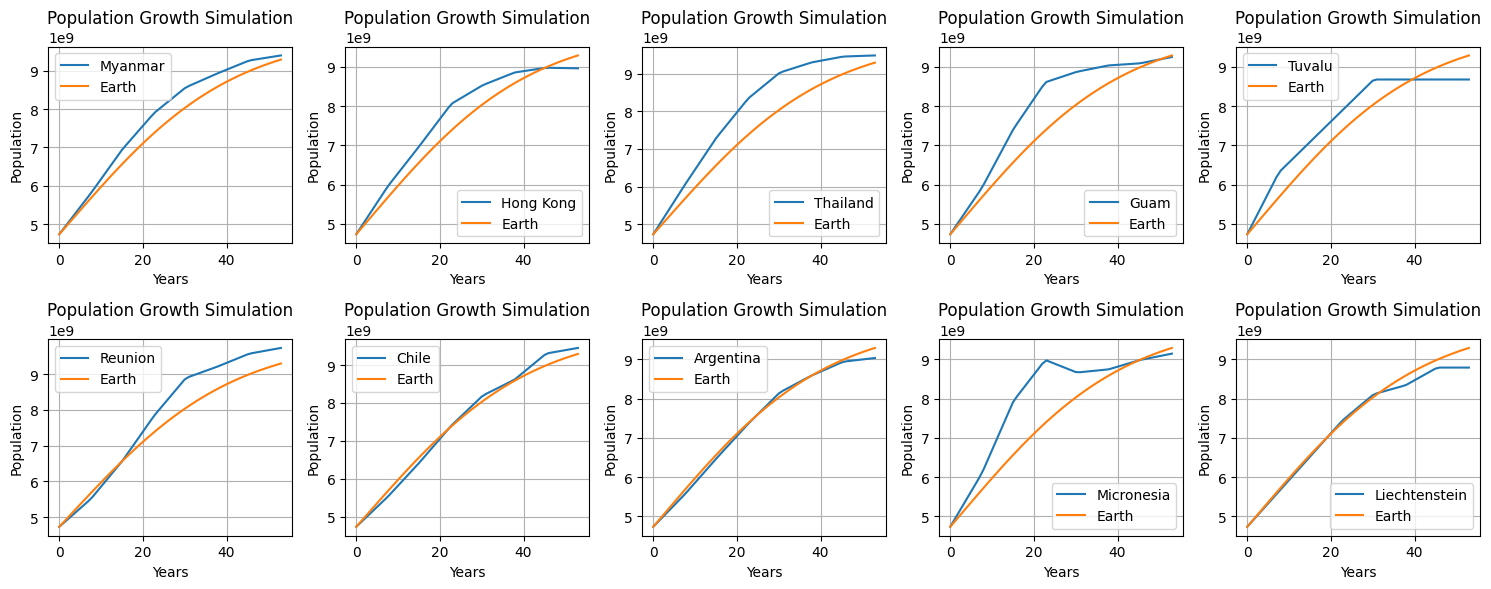

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
a = 0
for i, ax in enumerate(axes.flat):
    trend1 = countries_df.iloc[a,2:10]
    trend1 = trend1[::-1]
    trend1
    arr = []
    for elements in trend1:
        arr.append(elements)
    multiply = earth_df["Simulation"].iloc[20]/arr[0]
    arr = [x * multiply for x in arr]
    arr = np.interp(np.linspace(0, len(arr) - 1, 54), np.arange(len(arr)), arr)
    ax.plot(range(num_years-19), arr, label = countries_df['Name'].iloc[a])
    ax.plot(range(num_years-19), earth_df["Simulation"].iloc[20:], label = "Earth")
    ax.set_title('Population Growth Simulation')  # Example title
    ax.set_xlabel('Years')
    ax.set_ylabel('Population')
    ax.grid(True)
    ax.legend()
    a+=1
plt.tight_layout()

# Save the plot to a file
plt.savefig('all_plots.png')

# Show the plot (optional)
plt.show()